<a href="https://colab.research.google.com/github/bantiya/Data_Mining/blob/main/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/sem 2/584/Assignment/Assignment 2/cleveland-train.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease::category|-1|1
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
df.rename(columns={'heartdisease::category|-1|1': 'target'}, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

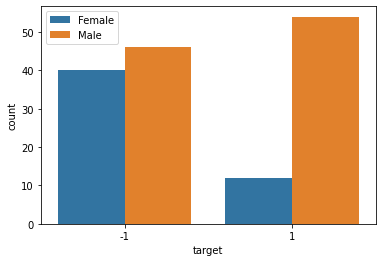

In [ ]:
ax = sns.countplot(x="target", hue="sex", data=df)
plt.legend(labels=["Female","Male"])

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,67,1,120,229,0,2,129,1,2.6,2,1,0,0,0,1,0,0,1,0,1,0
1,37,1,130,250,0,0,187,0,3.5,0,-1,0,0,1,0,1,0,0,0,0,1
2,56,1,120,236,0,0,178,0,0.8,0,-1,0,1,0,0,1,0,0,1,0,0
3,57,0,120,354,0,0,163,1,0.6,0,-1,0,0,0,1,1,0,0,1,0,0
4,63,1,130,254,0,2,147,0,1.4,1,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,120,157,0,0,182,0,0.0,0,-1,0,1,0,0,1,0,0,1,0,0
148,59,1,164,176,1,2,90,0,1.0,2,1,0,0,0,1,0,1,0,0,1,0
149,68,1,144,193,1,0,141,0,3.4,2,1,0,0,0,1,0,0,1,0,1,0
150,57,1,130,131,0,0,115,1,1.2,1,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
class LogisticRegresssion:

  def __init__(self, lr = 0.00001, n_iters=10000, tol = 10^-3):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.tol = tol
  
  def fit(self, X,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    cost_list = []

    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      cost = (1/n_samples) * np.sum(np.log(1 + np.exp(-y * np.dot(self.weights, X.T))))

      dw = (1 / n_samples) * np.dot(X.T,(y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

      if self.weights.any() < self.tol:
        return cost_list

      cost_list.append(cost)
    return cost_list

  def predict(self,X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else -1 for i in y_predicted]
    return y_predicted_cls

  def _sigmoid(self,x):
    return 1 /(1+ np.exp(-x))


In [ ]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
df_scaled = pd.DataFrame(sst.fit_transform(df.drop('target',axis=1)))

# Adding the Class column back to the DataFrame
df_scaled['Target'] = df.target
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Target
0,1.398434,0.72111,-0.592770,-0.368334,-0.389249,1.093147,-0.876722,1.645393,1.473297,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
1,-1.980929,0.72111,-0.029990,0.002908,-0.389249,-0.920893,1.595825,-0.607758,2.303391,-0.719605,-0.265372,-0.526603,1.762983,-0.948683,0.936239,-0.265372,-0.818737,-0.961276,-0.923936,3.986087,-1
2,0.159334,0.72111,-0.592770,-0.244587,-0.389249,-0.920893,1.212154,-0.607758,-0.186893,-0.719605,-0.265372,1.898963,-0.567221,-0.948683,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
3,0.271979,-1.38675,-0.592770,1.841436,-0.389249,-0.920893,0.572702,1.645393,-0.371358,-0.719605,-0.265372,-0.526603,-0.567221,1.054093,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
4,0.947852,0.72111,-0.029990,0.073620,-0.389249,1.093147,-0.109380,-0.607758,0.366504,0.385243,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-1.530347,0.72111,-0.592770,-1.641161,-0.389249,-0.920893,1.382674,-0.607758,-0.924755,-0.719605,-0.265372,1.898963,-0.567221,-0.948683,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
148,0.497270,0.72111,1.883459,-1.305276,2.569047,1.093147,-2.539296,-0.607758,-0.002427,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,3.768289,-0.818737,-0.961276,1.082326,-0.250873,1
149,1.511079,0.72111,0.757901,-1.004748,2.569047,-0.920893,-0.365161,-0.607758,2.211159,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
150,0.271979,0.72111,-0.029990,-2.100794,-0.389249,-0.920893,-1.473544,1.645393,0.182038,0.385243,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1


In [ ]:
X = df_scaled.iloc[:, :-1].values
y = df_scaled.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (121, 20)
Shape of Y_train :  (121,)
Shape of X_test :  (31, 20)
Shape of Y_test :  (31,)


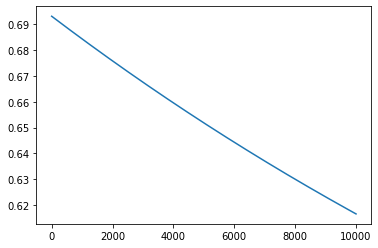

LR classification accuracy from custom Logistic Regression function: 0.8387096774193549
Classification error 0.16129032258064513
CPU times: user 700 ms, sys: 9.98 ms, total: 710 ms
Wall time: 713 ms


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 10000, 10^-3)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(10000), cost_list)
plt.show()

prediction = lr.predict(X_test)
a = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", a)
print("Classification error", 1 - a)

In [ ]:
acc_list = []
acc_list.append(a)
acc_list.append(1-a)

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['Label']= ['Accuracy(10000)', 'Classification error(10000)']
acc_df['Values']= acc_list
acc_df

,Label,Values
0,Accuracy(10000),0.83871
1,Classification error(10000),0.16129


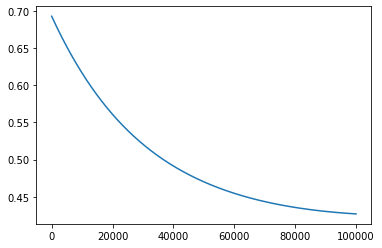

LR classification accuracy from custom Logistic Regression function: 0.8709677419354839
Classification error 0.12903225806451613
CPU times: user 5.34 s, sys: 48.9 ms, total: 5.39 s
Wall time: 5.38 s


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 100000, 10^-3)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(100000), cost_list)
plt.show()

prediction = lr.predict(X_test)
b21 = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", b21)
print("Classification error", 1 - b21)

In [ ]:
acc_df = acc_df.append({'Label' : 'Accuracy(100000)', 'Values' : b21}, ignore_index=True)
acc_df = acc_df.append({'Label' : 'Classification error(100000)', 'Values' : 1-b21}, ignore_index=True)
acc_df

,Label,Values
0,Accuracy(10000),0.838710
1,Classification error(10000),0.161290
2,Accuracy(100000),0.870968
3,Classification error(100000),0.129032


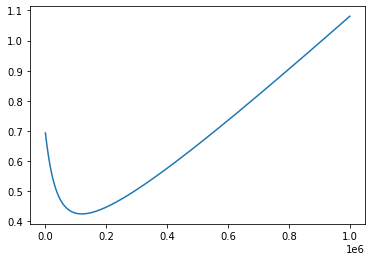

LR classification accuracy from custom Logistic Regression function: 0.8387096774193549
Classification error 0.16129032258064513
CPU times: user 50.6 s, sys: 220 ms, total: 50.8 s
Wall time: 51.3 s


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 1000000, 10^-3)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(1000000), cost_list)
plt.show()

prediction = lr.predict(X_test)
a12 = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", a12)
print("Classification error", 1 - a12)

In [ ]:
acc_df = acc_df.append({'Label' : 'Accuracy(1000000)', 'Values' : a12}, ignore_index=True)
acc_df = acc_df.append({'Label' : 'Classification error(1000000)', 'Values' : 1-a12}, ignore_index=True)
acc_df

,Label,Values
0,Accuracy(10000),0.838710
1,Classification error(10000),0.161290
2,Accuracy(100000),0.870968
3,Classification error(100000),0.129032
4,Accuracy(1000000),0.838710
5,Classification error(1000000),0.161290


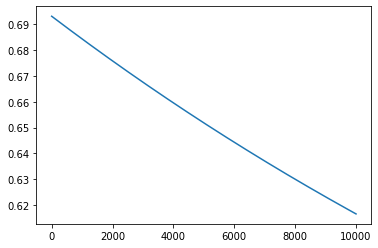

LR classification accuracy from custom Logistic Regression function: 0.8387096774193549
Classification error 0.16129032258064513
CPU times: user 694 ms, sys: 7.94 ms, total: 702 ms
Wall time: 708 ms


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 10000, 10^-6)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(10000), cost_list)
plt.show()

prediction = lr.predict(X_test)
a121 = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", a121)
print("Classification error", 1 - a121)

acc_df = acc_df.append({'Label' : 'Accuracy(10000,10^-6)', 'Values' : a121}, ignore_index=True)
acc_df = acc_df.append({'Label' : 'Classification error(10000,10^-6)', 'Values' : 1-a121}, ignore_index=True)
acc_df

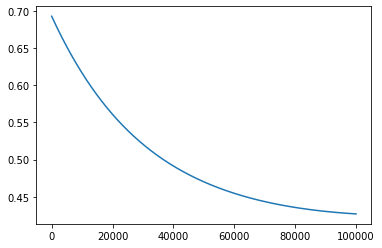

LR classification accuracy from custom Logistic Regression function: 0.8709677419354839
Classification error 0.12903225806451613
CPU times: user 5.3 s, sys: 32.8 ms, total: 5.34 s
Wall time: 5.35 s


In [ ]:
%%time

lr = LogisticRegresssion(0.00001, 100000, 10^-6)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(100000), cost_list)
plt.show()

prediction = lr.predict(X_test)
ab = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", ab)
print("Classification error", 1 - ab)

acc_df = acc_df.append({'Label' : 'Accuracy(100000,10^-6)', 'Values' : ab}, ignore_index=True)
acc_df = acc_df.append({'Label' : 'Classification error(100000,10^-6)', 'Values' : 1-ab}, ignore_index=True)
acc_df

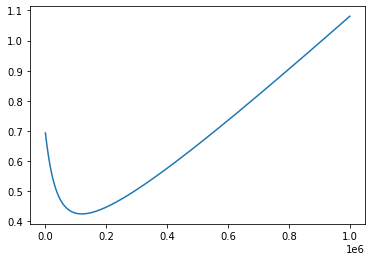

LR classification accuracy from custom Logistic Regression function: 0.8387096774193549
Classification error 0.16129032258064513
CPU times: user 52.4 s, sys: 207 ms, total: 52.6 s
Wall time: 55.5 s


In [ ]:
%%time

lr = LogisticRegresssion(0.00001, 1000000, 10^-6)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(1000000), cost_list)
plt.show()

prediction = lr.predict(X_test)
ab1 = accuracy(y_test, prediction)

print("LR classification accuracy from custom Logistic Regression function:", ab1)
print("Classification error", 1 - ab1)

acc_df = acc_df.append({'Label' : 'Accuracy(1000000,10^-6)', 'Values' : ab1}, ignore_index=True)
acc_df = acc_df.append({'Label' : 'Classification error(1000000,10^-6)', 'Values' : 1-ab1}, ignore_index=True)
acc_df

In [ ]:
%%time
from sklearn.linear_model import *
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
lr_prediction = log.predict(X_test)
print("LR classification accuracy from sklearn:", accuracy(y_test, lr_prediction))

LR classification accuracy from sklearn: 0.7741935483870968
CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 39.7 ms


In [ ]:
acc_df = acc_df.append({'Label' : 'Accuracy(LR sklearn)', 'Values' : accuracy(y_test, lr_prediction)}, ignore_index=True)
acc_df

,Label,Values
0,Accuracy(10000),0.838710
1,Classification error(10000),0.161290
2,Accuracy(100000),0.870968
3,Classification error(100000),0.129032
4,Accuracy(1000000),0.838710
5,Classification error(1000000),0.161290
6,"Accuracy(10000,10^-6)",0.838710
7,"Classification error(10000,10^-6)",0.161290
8,"Accuracy(100000,10^-6)",0.870968
9,"Classification error(100000,10^-6)",0.129032


In [ ]:
dft = pd.read_csv('/content/gdrive/MyDrive/sem 2/584/Assignment/Assignment 2/cleveland-train.csv')
dft

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease::category|-1|1
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
dft.rename(columns={'heartdisease::category|-1|1': 'target'}, inplace=True)
a = pd.get_dummies(dft['cp'], prefix = "cp")
b = pd.get_dummies(dft['thal'], prefix = "thal")
c = pd.get_dummies(dft['slope'], prefix = "slope")
frames = [dft, a, b, c]
dft = pd.concat(frames, axis = 1)
dft = dft.drop(columns = ['cp', 'thal', 'slope'])

# Importing StandardScaler from scikit-learn
sst = StandardScaler()

# Standardizing the data apart from the Class column
dft_scaled = pd.DataFrame(sst.fit_transform(dft.drop('target',axis=1)))

# Adding the Class column back to the DataFrame
dft_scaled['target'] = dft.target
dft_scaled

X1 = dft_scaled.iloc[:, :-1].values
y1 = dft_scaled.iloc[:, -1].values
print(X1)

[[ 1.3984336   0.72111026 -0.59276951 ... -0.96127552  1.08232554
  -0.2508726 ]
 [-1.980929    0.72111026 -0.02999021 ... -0.96127552 -0.92393644
   3.98608691]
 [ 0.15933398  0.72111026 -0.59276951 ...  1.04028447 -0.92393644
  -0.2508726 ]
 ...
 [ 1.51107902  0.72111026  0.75790081 ... -0.96127552  1.08232554
  -0.2508726 ]
 [ 0.2719794   0.72111026 -0.02999021 ... -0.96127552  1.08232554
  -0.2508726 ]
 [ 0.2719794  -1.38675049 -0.02999021 ... -0.96127552  1.08232554
  -0.2508726 ]]


In [ ]:
dfts = pd.read_csv('/content/gdrive/MyDrive/sem 2/584/Assignment/Assignment 2/cleveland-test.csv')
dfts

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,56,1,2,130,221,0,2,163,0,0.0,1,0,7
141,67,1,3,152,212,0,2,150,0,0.8,2,0,7
142,44,1,4,120,169,0,0,144,1,2.8,3,0,6
143,57,0,4,140,241,0,0,123,1,0.2,2,0,7


In [ ]:
a = pd.get_dummies(dfts['cp'], prefix = "cp")
b = pd.get_dummies(dfts['thal'], prefix = "thal")
c = pd.get_dummies(dfts['slope'], prefix = "slope")
frames = [dfts, a, b, c]
dfts = pd.concat(frames, axis = 1)
dfts = dfts.drop(columns = ['cp', 'thal', 'slope'])

# Importing StandardScaler from scikit-learn
sst = StandardScaler()

# Standardizing the data apart from the Class column
dfts_scaled = pd.DataFrame(sst.fit_transform(dfts))

X2 = dfts_scaled.to_numpy()


In [ ]:
lr1 = LogisticRegresssion(0.00001, 100000)

c1 = lr1.fit(X1, y1)

prediction101 = lr1.predict(X2)

In [ ]:
f = open("bhavya_p_584.dat", "x")

f.close()

In [ ]:
f = open("bhavya_p_584.dat", "a")
for i in prediction101:
  f.write(str(i))
  f.write("\n")
f.close()

In [ ]:
f = open("bhavya_p_584.dat", "r")
for x in f:
  print(x)

f.close()

-1

1

-1

1

1

1

-1

-1

-1

1

-1

-1

-1

1

1

-1

1

-1

-1

1

-1

-1

1

-1

-1

-1

1

-1

-1

-1

1

-1

-1

1

-1

1

-1

-1

1

-1

-1

1

-1

-1

-1

-1

-1

1

-1

-1

1

-1

-1

-1

1

1

-1

1

1

1

1

-1

1

-1

-1

-1

-1

-1

-1

1

1

-1

-1

1

1

-1

-1

1

1

1

1

-1

-1

1

-1

-1

-1

1

-1

1

-1

-1

1

-1

-1

-1

1

-1

1

1

-1

-1

-1

1

1

1

1

-1

-1

-1

-1

1

-1

-1

1

-1

-1

1

-1

1

-1

-1

-1

-1

-1

-1

-1

-1

-1

1

-1

1

-1

1

-1

-1

-1

1

1

1

-1

1

1

1

-1

